##Working with multiple data sources and studying purchase behaviour


We've added names and addresses for the customers included in the instacart data, this data is hosted on a public API.  

Information:

API : https://jdw6paifodaa6hb7alta76h4te0erogq.lambda-url.us-west-2.on.aws/

How to use:

To get the record for a particular Customer ID, add the ID to the url, for example customer id 7 is

https://jdw6paifodaa6hb7alta76h4te0erogq.lambda-url.us-west-2.on.aws/7

To bulk access the customer id data add query parameters for startid and size: https://jdw6paifodaa6hb7alta76h4te0erogq.lambda-url.us-west-2.on.aws/bulk?startid=23&size=500

You can download a parquet file of the full instacart data in colab with:
```python
!wget https://msai-339-public.s3.amazonaws.com/instacart-export/sampled-parquet000.parquet
df = pd.read_parquet("sampled-parquet000.parquet")
```


**SCHEMA INFORMATION OF API DATA**


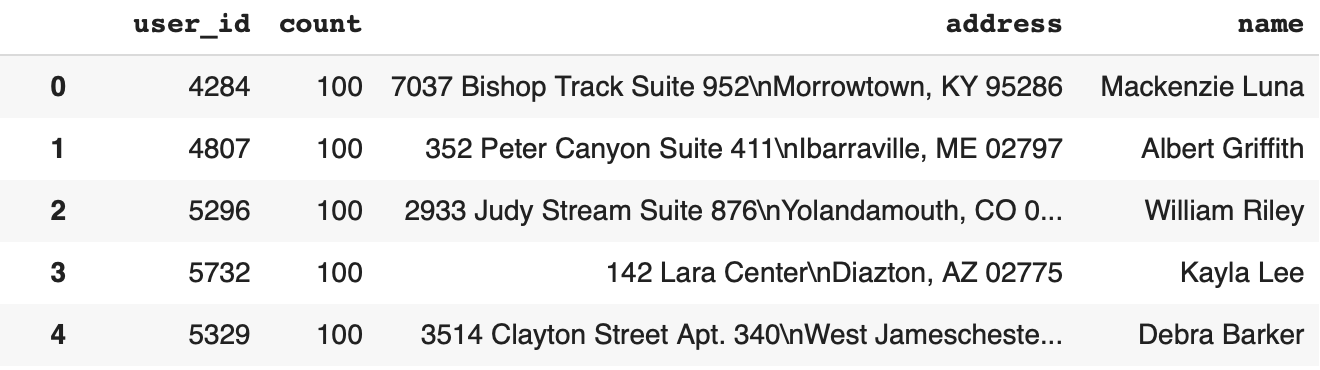

In [ ]:
#@title Standard imports for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
#add or use other visualization libraries as you prefer

from datetime import datetime, timedelta
from dateutil.parser import parse
from google.colab import data_table
data_table.enable_dataframe_formatter()

## **To do:**
Download data and access API to store locally as needed to answer the following questions

In [ ]:
# Access data to store locally
!wget https://msai-339-public.s3.amazonaws.com/instacart-export/sampled-parquet000.parquet
df = pd.read_parquet("sampled-parquet000.parquet")

--2022-10-22 03:02:11--  https://msai-339-public.s3.amazonaws.com/instacart-export/sampled-parquet000.parquet
Resolving msai-339-public.s3.amazonaws.com (msai-339-public.s3.amazonaws.com)... 3.5.6.160
Connecting to msai-339-public.s3.amazonaws.com (msai-339-public.s3.amazonaws.com)|3.5.6.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16638944 (16M) [binary/octet-stream]
Saving to: ‘sampled-parquet000.parquet.4’

sampled-parquet000. 100%[===================>]  15.87M  10.2MB/s    in 1.6s    

2022-10-22 03:02:13 (10.2 MB/s) - ‘sampled-parquet000.parquet.4’ saved [16638944/16638944]



In [ ]:
df.head(10)

,index,product_id,product_name,aisle_id,department_id,add_to_cart_order,reordered,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,31411719,48057,"Hummus, Hope, Original Recipe",67,20,13,0,1616406,36799,prior,6,1,9,8.0,fresh dips tapenades,deli
1,29451567,45603,Trilogy Kombucha Drink,31,7,10,1,970656,109757,prior,9,0,14,4.0,refrigerated,beverages
2,7893146,13176,Bag of Organic Bananas,24,4,1,1,2689061,60742,prior,19,2,11,11.0,fresh fruits,produce
3,30559876,47209,Organic Hass Avocado,24,4,6,0,1507434,196485,prior,1,2,17,NaN,fresh fruits,produce
4,12873793,21267,Sourdough Bread,112,3,17,1,2118465,180962,prior,14,2,20,6.0,bread,bakery
5,29568910,45763,Mini Seedless Cucumbers,83,4,8,0,3021705,46309,prior,1,0,14,NaN,fresh vegetables,produce
6,9904363,16797,Strawberries,24,4,2,1,3295381,18173,prior,16,3,12,28.0,fresh fruits,produce
7,11180960,18727,Smoked Apple Sage Sausages,106,12,13,1,939231,5898,prior,9,6,9,12.0,hot dogs bacon sausage,meat seafood
8,3837462,6532,Organic YoKids Very Berry Smoothies,120,16,2,1,987401,40738,prior,11,5,18,7.0,yogurt,dairy eggs
9,20853575,32020,Classic Ranch Yogurt Dressing,89,13,10,1,2503179,105916,prior,21,2,7,15.0,salad dressing toppings,pantry


In [ ]:
df.describe()

,index,product_id,aisle_id,department_id,add_to_cart_order,reordered,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,6.000000e+05,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,6.000000e+05,600000.000000,600000.000000,600000.000000,600000.000000,561474.000000
mean,1.619151e+07,25538.460700,71.163172,9.924133,8.338818,0.590228,1.711140e+06,102982.917968,17.128865,2.739673,13.427550,11.090854
std,9.356917e+06,14087.502776,38.216470,6.279717,7.128904,0.491792,9.865959e+05,59420.933577,17.541153,2.091202,4.249604,8.762223
min,7.600000e+01,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.097591e+06,13517.000000,31.000000,4.000000,3.000000,0.000000,8.581060e+05,51589.750000,5.000000,1.000000,10.000000,5.000000
50%,1.617272e+07,25146.000000,83.000000,9.000000,6.000000,1.000000,1.711809e+06,102507.000000,11.000000,3.000000,13.000000,8.000000
75%,2.428922e+07,37807.000000,107.000000,16.000000,11.000000,1.000000,2.564330e+06,154455.000000,24.000000,5.000000,16.000000,15.000000
max,3.243447e+07,49688.000000,134.000000,21.000000,141.000000,1.000000,3.421072e+06,206209.000000,99.000000,6.000000,23.000000,30.000000


In [ ]:
import json
import requests
data = []
min_v = 2
max_v = 206209
for i in range(min_v,max_v+1,1000):
  response = requests.get('https://jdw6paifodaa6hb7alta76h4te0erogq.lambda-url.us-west-2.on.aws/bulk?startid='+str(i)+'&size=1000')
  data.append(json.loads(response.text))

In [ ]:
data = [i for j in data for i in j]
pd.DataFrame(data).to_csv('customer_data_new.csv')

In [ ]:
user_info = pd.read_csv ("customer_data_new.csv")
print(user_info.shape)
user_info.head(5)

(206208, 4)


,Unnamed: 0,user_id,name,address
0,0,2,Kyle Haas,"43203 Turner Spring\nNew Anthony, NH 45415"
1,1,3,Theresa Howard,"4247 Lisa Mountains Apt. 447\nRobinsonberg, SD..."
2,2,4,Wayne Scott,"7042 Taylor Causeway\nHoffmantown, MA 40593"
3,3,5,Justin Compton,"1709 Amber Passage\nRothmouth, NJ 12022"
4,4,6,Jeremiah Fernandez,"663 Barron Wall\nWest Joshuahaven, WI 59740"


In [ ]:
print(df.shape)
print(user_info.shape)
print(type(user_info))

(600000, 16)
(206208, 4)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
frames = pd.merge(df, user_info, on='user_id') #merging the two datasets into one called frames
#frames = frames.drop_duplicates('order_id')
frames.shape
frames.head(5)

,index,product_id,product_name,aisle_id,department_id,add_to_cart_order,reordered,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department,Unnamed: 0,name,address
0,31411719,48057,"Hummus, Hope, Original Recipe",67,20,13,0,1616406,36799,prior,6,1,9,8.0,fresh dips tapenades,deli,36797,Diane Jimenez,"7534 William Loaf Apt. 968\nSouth Larryhaven, ..."
1,9251889,15527,Teriyaki Veggie Burgers,14,20,11,0,3016330,36799,prior,4,1,9,13.0,tofu meat alternatives,deli,36797,Diane Jimenez,"7534 William Loaf Apt. 968\nSouth Larryhaven, ..."
2,5121949,8580,VitaminWater Zero™ XXX Acai Blueberry Pomegranate,64,7,8,1,1605002,36799,prior,10,0,9,3.0,energy sports drinks,beverages,36797,Diane Jimenez,"7534 William Loaf Apt. 968\nSouth Larryhaven, ..."
3,27707478,43154,Sparkling Mineral Water,115,7,4,1,1701035,36799,prior,12,1,11,8.0,water seltzer sparkling water,beverages,36797,Diane Jimenez,"7534 William Loaf Apt. 968\nSouth Larryhaven, ..."
4,23710912,36771,Twig Kukicha Tea,94,7,17,0,1605002,36799,prior,10,0,9,3.0,tea,beverages,36797,Diane Jimenez,"7534 William Loaf Apt. 968\nSouth Larryhaven, ..."


In [ ]:
print(len(df['user_id']))
print(len(frames['user_id']))
print(len(frames['address']))
print(len(frames['name']))

600000
600000
600000
600000


## For all the questions below write a 40-80 word assessment of what patterns/insights on application you gain from the result set.

The purpose of this part of the assignment is to interpret the question and make your own conclusion on the answer.

## 1. Produce a heatmap of the United States where each state gets its color based on the number of orders from that state.

In [ ]:
frames1 = frames.drop_duplicates('order_id')

In [ ]:
address_list = frames['address'].reset_index(drop=True)
state = []
for i in range(len(address_list)):
  # print(i, address_list[i])
  state.append(address_list[i][-8:-6])
frames['states'] = state
frames['states']

0         TN
1         TN
2         TN
3         TN
4         TN
          ..
599995    WV
599996    CT
599997    DE
599998    HI
599999    ID
Name: states, Length: 535793, dtype: object

In [ ]:
invalid_states = frames[ (frames['states'] == 'AA') | (frames['states'] == 'AE') | (frames['states']=='AP')].index
frames.drop(invalid_states , inplace=True)

In [ ]:
count = []
count.append(frames.groupby('states'))
state_orders = frames['states'].value_counts() #count of the orders by each state
state_orders[:10]

MN    11497
KY    11114
MA    10945
NV    10902
WA    10883
IA    10858
ND    10831
NH    10796
KS    10786
CA    10769
Name: states, dtype: int64

In [ ]:
mx = state_orders.tolist() #converting state_orders to list
print(mx)

[11497, 11114, 10945, 10902, 10883, 10858, 10831, 10796, 10786, 10769, 10744, 10698, 10642, 10631, 10617, 10606, 10595, 10583, 10574, 10568, 10541, 10523, 10505, 10489, 10479, 10476, 10474, 10458, 10452, 10439, 10437, 10435, 10403, 10398, 10374, 10370, 10361, 10353, 10351, 10348, 10302, 10270, 10216, 10213, 10150, 10135, 10079, 10056, 10044, 10016, 10007]


In [ ]:
state_unique = frames.states.unique().tolist() #getting only the unique values
state_unique

['TN',
 'KS',
 'AL',
 'AK',
 'DE',
 'WA',
 'PA',
 'IL',
 'ME',
 'NH',
 'KY',
 'GA',
 'NV',
 'NY',
 'CT',
 'NM',
 'WI',
 'ND',
 'NC',
 'CA',
 'HI',
 'MS',
 'NJ',
 'RI',
 'MO',
 'DC',
 'FL',
 'OH',
 'IA',
 'SC',
 'MA',
 'MN',
 'MD',
 'SD',
 'ID',
 'OK',
 'MI',
 'TX',
 'VA',
 'CO',
 'MT',
 'VT',
 'NE',
 'WY',
 'AR',
 'OR',
 'AZ',
 'UT',
 'IN',
 'LA',
 'WV']

In [ ]:
state_orders.values

array([11497, 11114, 10945, 10902, 10883, 10858, 10831, 10796, 10786,
       10769, 10744, 10698, 10642, 10631, 10617, 10606, 10595, 10583,
       10574, 10568, 10541, 10523, 10505, 10489, 10479, 10476, 10474,
       10458, 10452, 10439, 10437, 10435, 10403, 10398, 10374, 10370,
       10361, 10353, 10351, 10348, 10302, 10270, 10216, 10213, 10150,
       10135, 10079, 10056, 10044, 10016, 10007])

In [ ]:
mx_df = pd.DataFrame() #converting into dataframe
mx_df["states"] = state_orders.keys()
mx_df["frequency"] = state_orders.values #assigning frequency as values to the keys
mx_df.shape
mx_df[:5]

,states,frequency
0,MN,11497
1,KY,11114
2,MA,10945
3,NV,10902
4,WA,10883


In [ ]:
invalid_states = mx_df[ (mx_df['states'] == 'AA') | (mx_df['states'] == 'AE') | (mx_df['states']=='AP')].index #dropping the military state codes
mx_df.drop(invalid_states , inplace=True)
mx_df.head(5)

,states,frequency
0,MN,11497
1,KY,11114
2,MA,10945
3,NV,10902
4,WA,10883


In [ ]:
# Your code here
fig = px.choropleth(mx_df,
                    locations='states',
                    locationmode="USA-states",
                    scope="usa",
                    color='frequency'
                    )


fig.show()

**Data Analysis and the things I did:** The states column included addresses of military installations in the US. The military codes were not formatted like the rest of the database and hence were causing handling problems. So, I dropped the three states (AA, AE, AP) from the database. I sliced the addresses to get the state names. I observed how many times eachstate was occurring through value counts (which is basically the number of orders). Then, I plotted the heatmap using the unique states.

**Heatmap Analysis:** MN tops the orders game with the huge margin. KY, NV, WA are also have very good amount of orders. IN, IL, AZ, OR, SC, and WV are some states where the number of orders are comparitively very low. It would be a good strategy to advertise more in these states.  

## 2. Show the first name, last name, street address, city, state, area code, as well as the number of orders for the top 10 customers with the highest number of purchases.


In [ ]:
# Your code here
frames[['first_name', 'last_name', 'blank1', 'blank2']] = frames['name'].str.split(pat = ' ', expand = True)
#blank1 and blank2 beacuse the name column was splitting into extra columns
area_code = []
for i in range(len(address_list)):
  area_code.append(address_list[i][-5:]) #slicing to get area code since it has fixed length
frames['area_code'] = area_code

frames[['first_name', 'last_name', 'area_code'][:10]]

,first_name,last_name,area_code
0,Diane,Jimenez,33087
1,Diane,Jimenez,33087
2,Diane,Jimenez,33087
3,Diane,Jimenez,33087
4,Diane,Jimenez,33087
...,...,...,...
599995,Diana,Reyes,19150
599996,Scott,Hill,31414
599997,Angela,Washington,91434
599998,Michael,Brown,76416


We can see that each user might have multiple orders. Let's see the number of orders by each user.

In [ ]:
frames['user_id'].value_counts()

186704    53
164055    47
201268    42
79106     42
33731     41
          ..
46537      1
142152     1
165666     1
108179     1
55011      1
Name: user_id, Length: 132592, dtype: int64

Ah we can get the top customers like this

In [ ]:
grouped_by_users = frames1.groupby(['user_id']).count().sort_values(by=['order_id'], ascending = False) #grouping the frames by user id, sorting them according to user id in descending order, displaying 10 rows
grouped_by_users[:5]

,index,product_id,product_name,aisle_id,department_id,add_to_cart_order,reordered,order_id,eval_set,order_number,...,aisle,department,Unnamed: 0,name,address,states,first_name,last_name,blank1,blank2
user_id,,,,,,,,,,,,,,,,,,,,,
186704,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,0,0
164055,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,0,0
79106,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,0,0
201268,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,0,0
33731,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,0,0


In [ ]:
address_list[0]
frames[['street_address', 'city']] = frames['address'].str.split(pat = '\n', expand = True) #getting the street address and city names
city = frames['city'].str.split(pat = ',', expand = True)
frames ['city'] = city[0]
frames.head(5)

,index,product_id,product_name,aisle_id,department_id,add_to_cart_order,reordered,order_id,user_id,eval_set,...,name,address,states,first_name,last_name,blank1,blank2,area_code,street_address,city
0,31411719,48057,"Hummus, Hope, Original Recipe",67,20,13,0,1616406,36799,prior,...,Diane Jimenez,"7534 William Loaf Apt. 968\nSouth Larryhaven, ...",TN,Diane,Jimenez,None,None,33087,7534 William Loaf Apt. 968,South Larryhaven
1,9251889,15527,Teriyaki Veggie Burgers,14,20,11,0,3016330,36799,prior,...,Diane Jimenez,"7534 William Loaf Apt. 968\nSouth Larryhaven, ...",TN,Diane,Jimenez,None,None,33087,7534 William Loaf Apt. 968,South Larryhaven
2,5121949,8580,VitaminWater Zero™ XXX Acai Blueberry Pomegranate,64,7,8,1,1605002,36799,prior,...,Diane Jimenez,"7534 William Loaf Apt. 968\nSouth Larryhaven, ...",TN,Diane,Jimenez,None,None,33087,7534 William Loaf Apt. 968,South Larryhaven
3,27707478,43154,Sparkling Mineral Water,115,7,4,1,1701035,36799,prior,...,Diane Jimenez,"7534 William Loaf Apt. 968\nSouth Larryhaven, ...",TN,Diane,Jimenez,None,None,33087,7534 William Loaf Apt. 968,South Larryhaven
4,23710912,36771,Twig Kukicha Tea,94,7,17,0,1605002,36799,prior,...,Diane Jimenez,"7534 William Loaf Apt. 968\nSouth Larryhaven, ...",TN,Diane,Jimenez,None,None,33087,7534 William Loaf Apt. 968,South Larryhaven


In [ ]:
new_df = pd.DataFrame()
new_df["user_id"] = frames1["user_id"].value_counts().keys()
new_df["count"] = frames1["user_id"].value_counts().values

new_df_top10 = new_df.sort_values(by=['count'], ascending = False)[:10]
mergedRes = pd.merge(new_df_top10, frames, on ='user_id') #creating a new df and formatting according to the question given
mergedRes = mergedRes.drop_duplicates('user_id')
mergedRes[['user_id', 'first_name', 'last_name', 'street_address', 'city', 'states', 'area_code', 'count']]

,user_id,first_name,last_name,street_address,city,states,area_code,count
0,186704,Jeffrey,Fisher,5871 Brooks Loaf,Port Joshuaville,CA,29262,53
77,164055,Shannon,Leach,628 Joseph Causeway,Michaelhaven,OR,83706,47
136,201268,Martin,Lara,19157 Kristy Falls,Brookeburgh,CO,15519,42
203,79106,Jordan,Ramirez,828 Jared Green Apt. 605,Martinview,OK,15124,42
259,33731,Rodney,Meyer,66062 Jeremy Parks Suite 784,Joannefort,NY,11964,41
317,3830,Amy,Hodges,68529 Murphy Village Apt. 897,New Tracy,WI,09470,40
368,13701,Amy,Morgan,7075 William Garden,East Jacobshire,VT,45662,39
416,182401,Kimberly,Jacobson,78052 Tanya Rest,Toddton,MD,35493,39
473,4694,Elizabeth,Carpenter,7373 Michelle Mission Apt. 811,Thompsonshire,OK,34601,38
524,95967,Ian,Green,569 Mason Island Suite 367,North Sarahchester,AR,86481,37


Data Analysis and things I did: I sliced the address to get the area code since it has a fixed length. I retrieved value counts of order_ids which essentially are the number of times the user has purchased an item. The cities and street addresses were separated by commas so I extracted them splitting that way. For the answer, I made a dataframe with the asked columns sorted by counts.

Top 10 customers analysis: Jeffrey Fisher from California is the top customer. The top 10 customers have ordered around 50 times. Since these people look like regular customers and are more likely to buy stuff, it could be a good strategy to analyse their purchasing patterns, sending targeted advertisements, and arranging prizes or gifts if they order above a certain amount of dollars.

## 3. Find out the most frequently ordered product for each state.

In [ ]:
groupby_df = frames.groupby(['states', 'product_id', 'product_name']).count()['order_id'].groupby(level=0, group_keys=False)
most_frequent_orders = groupby_df.nlargest(1).to_frame().rename(columns={'order_id':'count'})
most_frequent_orders

,,,count
states,product_id,product_name,
AK,24852,Banana,149
AL,24852,Banana,144
AR,24852,Banana,126
AZ,24852,Banana,158
CA,24852,Banana,168
CO,24852,Banana,140
CT,24852,Banana,160
DC,24852,Banana,178
DE,24852,Banana,171


Analysis: All the states have Bananas as their most ordered product. People really like ordering bananas from instacart in the US. The only variation is in SD and OH where people prefer to buy a bag of organic bananas instead of normal bananas. This information can be used to promote the bag of organic bananas to other states the way they did in SD and OH (assuming the bag of organic bananas is costlier). I have used groupby, nlargest, toframe, and rename functions to get to the result.

## 4. Find out the cities with the largest number of orders.

In [ ]:
# Your code here
popular_cities = frames[~frames['city'].isin(invalid_states)].groupby(['city','states']).nunique()['order_id'].nlargest(10)
popular_cities=popular_cities.to_frame().reset_index().rename(columns = {'order_id': 'count'})
popular_cities[:10]

,city,states,count
0,Port Joshuaville,CA,53
1,Michaelhaven,OR,47
2,Michaelstad,MI,43
3,Brookeburgh,CO,42
4,Martinview,OK,42
5,East Michael,VT,41
6,Joannefort,NY,41
7,Robertchester,NV,41
8,Amandamouth,MD,40
9,East James,ME,40


Analysis: We can notice that the cities who have the most number of orders matches out top customers list. This tells us something about the dataset. It is either possible that not enough peoples' data has been collected from each city or it can simply mean that instacart needs more promotion in those cities since even when the top customers are from the given cities, the count is not really that high. These cities might have a lot of potential for giving out regular customers.

## 5. Which product has the lowest sales in the cities with the highest number of orders?

In [ ]:
# Your code here
popular_cities = popular_cities.nlargest(10, 'count')
top_df = frames.merge(popular_cities, left_on=['city','states'],right_on = ['city','states'])
top_df.groupby(['city','states','product_id','product_name']).count()['order_id'].groupby(level = 0, group_keys = False).nsmallest(1).to_frame()

,,,,order_id
city,states,product_id,product_name,
Amandamouth,MD,1360,Crunchy Peanut Butter,1
Brookeburgh,CO,34,Peanut Butter Cereal,1
East James,ME,781,Organic Shredded Mild Cheddar,1
East Michael,VT,1253,93% Lean Ground Beef,1
Joannefort,NY,77,Coconut Chocolate Chip Energy Bar,1
Martinview,OK,49,Vegetarian Grain Meat Sausages Italian - 4 CT,1
Michaelhaven,OR,1157,Wheat Sandwich Bread,1
Michaelstad,MI,148,Nectarines,1
Port Joshuaville,CA,2996,Honeysuckle Hand Soap,1


Analysis: Using the previous answer, we found out the lowest selling items in those popular cities. I have grouped the data by city, states, product_id, and product_name. I have counted the values and arranged them in the smallest-first order using nsmallest.

 These products have the lowest sales in the most popular cities (cities where instacart is popular). It might be a good idea to get rid of these items and make space for new ones which relate to the top selling items. Finding out a reason behind this also might help.

## 6. Which is the busiest hour of orders in each state?

In [ ]:
# Your code here
busiest_hour_state = frames.groupby(['states', 'order_hour_of_day'])['order_hour_of_day'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('states', keep='first')
busiest_hour_state

,states,order_hour_of_day,count
0,WA,10,1011
1,MN,11,997
2,MA,10,983
4,RI,15,978
5,MI,11,970
6,IA,14,967
7,ND,11,965
10,CA,14,956
13,NM,10,946
15,NH,10,944


Analysis: From the table, we can see that the highest order count is 903 for WA at 10 am. We can see that for almost all the the states the most busiest hours lie around noon. For no state, the busiest hour exceeds 15. This means that most people tend to buy stuff during the day, not in the morning or evening. This information can be used to plan the time for advertisements or increasing or decreasing staff members or delivery people. I have grouped the data by states and order_hour_of_day, aggregated count, sorted values in descending order of count (the highest order count (and state) gets displayed first for analysis purpose). I have also dropped duplicates of states and kept just the first one (since the first one in ordered list will be the highest).    

## 7. Which product is the most purchased during the busiest hour in each state?

In [ ]:
#Your code here
new_df = frames.groupby(['states', 'order_hour_of_day'])['order_hour_of_day'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('states', keep='first')

mergedRes = pd.merge(new_df, frames, on=['states','order_hour_of_day'])
groupby_df = mergedRes.groupby(['states','product_name'])['product_name'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('product_name', keep='first')
groupby_df.groupby(level = 0, group_keys=False)
groupby_df.drop_duplicates('states')

,states,product_name,count
0,NE,Banana,24
9,WY,Bag of Organic Bananas,18
25,MA,Organic Strawberries,14
49,ME,Organic Avocado,12
50,NV,Organic Hass Avocado,12
61,HI,Organic Baby Spinach,11
63,SD,Organic Raspberries,11
80,AZ,Organic Yellow Onion,10
90,CT,Strawberries,10
98,MS,Limes,9


Analysis: Bananas and bag of organic bananas again top the list naturally. All the states have different products as their top item in the busiest hour. We can observe that although the top purchased item was banana for almost all the states, they do not neccessarily get purchased during the same time period of the day. I have used the same concept and code from the answer number 6 for the first part of the answer. I have grouped the data by states ad product name, agregated the count, sorted values by count in descending order for analysis purpose. I have also dropped duplicates of product name and kept the first one since it is ought to be the highest in an ordered manner.  